# Day 8 Lesson

Today we are looking closely at 2 types of statistical significance tests.

First, we are going to remind ourselves of how single-variable significance tests work.

Second, since we are in the multivariate regression unit, we will look at F-tests and see that they can be interpreted in the same way, though the execution is different.

Third, if we have time we will test for multicolinearity, something that previously we only could see through odd regression results and the fairly opaque "eigenvalue" diagnostic.

In [ ]:
import numpy as np #managing data
import pandas as pd #managing data
import scipy.stats as st
import seaborn as sns #Figures
import matplotlib.pyplot as plt #Also figures
import statsmodels.formula.api as smf #regression
import math #squareroots and other math operations, mostly
from statsmodels.stats.outliers_influence import variance_inflation_factor

Load data from previous lesson.

In [ ]:
africaDF = pd.read_csv('sample_data/african_crises.csv')
africaDF

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


# Reminder of Significance Tests

First here is a simple regression using year and CPI as predictors.

In [ ]:
modelSingle = smf.ols('exch_usd ~ year + inflation_annual_cpi', data = africaDF).fit()
print(modelSingle.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.10
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.75e-15
Time:                        03:44:13   Log-Likelihood:                -6460.0
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1056   BIC:                         1.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1589.2900 

We got a p-value of 0.478 on CPI. How often is a random variable more significant than CPI? 47.8% of the time. Let's test.

In [ ]:
#Making a random variable. It is junk so it will have a HIGH p-value and a low t-value.
africaDF['r1'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
modelSingle = smf.ols('exch_usd ~ year + r1', data = africaDF).fit()
print(modelSingle.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     34.97
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.97e-15
Time:                        03:46:53   Log-Likelihood:                -6460.1
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1056   BIC:                         1.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1587.2042    195.077     -8.136      0.0

Please write your t-value and p-value for r1, a totally random variable, on the board. Across the class, only about 47.8% of them will be more significant than CPI.

## Conducting an F-test

But how does this scale? Is there a way to test the significance of many variables together, joint significance?

I note joint significance means that *together* the items are capable predictors. Often, individually weak predictors combine together to be jointly significant. Think about a sports team - your team might not have any all-stars, but if they work together well, they still win!

Let's test if these 3 variables are jointly significant: *domestic_debt_in_default, sovereign_external_debt_default, and inflation_crises*

In [ ]:
#First, we use everything. This is called an "unrestricted model" because we do not restrict what is in it.
modelUnrestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi + domestic_debt_in_default + sovereign_external_debt_default + inflation_crises', data = africaDF).fit()
print(modelUnrestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     74.06
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.53e-66
Time:                        03:52:19   Log-Likelihood:                -6334.5
No. Observations:                1059   AIC:                         1.268e+04
Df Residuals:                    1053   BIC:                         1.271e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
#Then, we drop all the variables we wanted to test.
modelRestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi', data = africaDF).fit()
print(modelRestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.10
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.75e-15
Time:                        03:52:24   Log-Likelihood:                -6460.0
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1056   BIC:                         1.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1589.2900 

In [ ]:
# we need the residuals SQUARED again. Keep in mind residuals are stored in the object
SSR_ur = sum(modelUnrestricted.resid**2)
SSR_r = sum(modelRestricted.resid**2)
q = 3 #Number of elements in family we are testing.
n = 1059 # Number of observations
k = 5 # Number of elements in the unrestricted regression.
dfd = n-k-1 # This is the "degrees of freedom" Note the - 1 for intercept.

In [ ]:
f_score = ( (SSR_r - SSR_ur)/q ) / ( SSR_ur/(dfd) )
f_score

93.86024961220349

In [ ]:
1 - st.f.cdf(f_score, q, dfd)

1.1102230246251565e-16

So with this **extremely small** p value, what do we do with:

*   H0: The variables are jointly insignificant.
*   HA: The variables are jointly significant.

Hint: Look at earlier p-values and what they are used for.


## A second example, using RNG values.

They are all junk. So they should have high p-values.

In [ ]:
africaDF['r1'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r2'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r3'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r4'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))
africaDF['r5'] = np.random.randint(1,100,len(africaDF.iloc[:,1]))

In [ ]:
modelUnrestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi + r1 + r2 + r3+ r4 + r5', data = africaDF).fit()
print(modelUnrestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     10.73
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.13e-13
Time:                        03:55:09   Log-Likelihood:                -6457.5
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1051   BIC:                         1.297e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1595.5324 

In [ ]:
modelRestricted = smf.ols('exch_usd ~ year + inflation_annual_cpi', data = africaDF).fit()
print(modelRestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.10
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.75e-15
Time:                        03:55:16   Log-Likelihood:                -6460.0
No. Observations:                1059   AIC:                         1.293e+04
Df Residuals:                    1056   BIC:                         1.294e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1589.2900 

In [ ]:
SSR_ur = sum(modelUnrestricted.resid**2)
SSR_r = sum(modelRestricted.resid**2)
q = 5 #Number of elements in family we are testing.
n = 1059
k = 7 # q + remaining elements in regression. Note the - 1 for intercept
dfd = n-k-1

In [ ]:
f_score = ( (SSR_r - SSR_ur)/q ) / ( SSR_ur/(dfd) )
f_score

0.987768675647158

In [ ]:
1 - st.f.cdf(f_score, q, dfd)

0.423950755318415

So with this **extremely large** p value, what do we do with:

*   H0: The variables are jointly insignificant.
*   HA: The variables are jointly significant.

Hint: Look at earlier p-values and what they are used for.

# Multicolinearity

Multicolinearity is a major problem in regression. However, the base python error is wildly insufficient to indicate the problem.

Here, I am going to create a variable called 'inv_r1' that will make horrible multicolinarity, and Python will basically ignore it.

<Axes: xlabel='r1', ylabel='inv_r1'>

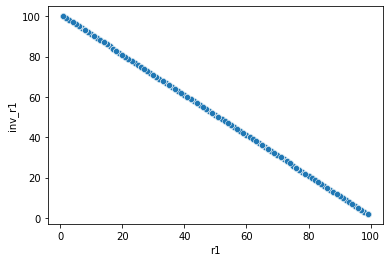

In [ ]:
africaDF['inv_r1'] = 101 - africaDF['r1']
sns.scatterplot(x = africaDF['r1'],y = africaDF['inv_r1'])

You can see that inv_r1 has an exact relationship to r1 (thus the name). Because they are so linearly dependant on one another, they will cause serious problems. Python will not really make much of a fuss about this very big problem either.

In [ ]:
modelRestricted = smf.ols('exch_usd ~ inv_r1 + r1', data = africaDF).fit()
print(modelRestricted.summary())

                            OLS Regression Results                            
Dep. Variable:               exch_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3176
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.573
Time:                        20:45:59   Log-Likelihood:                -6493.9
No. Observations:                1059   AIC:                         1.299e+04
Df Residuals:                    1057   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.001     12.601      0.0

The error message here is:

The smallest eigenvalue is ***1.75e-28***. This might indicate that there are strong multicollinearity problems or that the design matrix is singular.

Compare to earlier:

The condition number is large, ***4.12e+07***. This might indicate that there are
strong multicollinearity or other numerical problems.

## VIF Test

There is a test to determine if multicolinearity is a problem, here is the VIF test, "**V**ariance **I**nflation **F**actor".  I will be conducting it manually here:

In [ ]:
modelVIF = smf.ols('inv_r1 ~ r1', data = africaDF).fit()
print(modelVIF.summary())

                            OLS Regression Results                            
Dep. Variable:                 inv_r1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.109e+33
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:45:59   Log-Likelihood:                 31529.
No. Observations:                1059   AIC:                        -6.305e+04
Df Residuals:                    1057   BIC:                        -6.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.0000   1.77e-15   5.69e+16      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic canc

Finally, a real error. Other software will would have issued something for the multicolinearity set of estimations.

In [ ]:
# vifScore = 1/(1-R_squared)
vifScore = 1/(1-1.000)
# vifScore = 1/0, infinity/NAN

If the VIF score is greater than 5, we likely have a problem.
This is a rule of thumb, note that: 4.9999 does not mean we are problem-free, we should still flag something is wrong at that point.    Our test returns 1/0 which is roughly infinity or undefined. That's pretty big!  Very serious multicolinearity is absolutely a problem here.

# Activities

Do any 3:

1.   Show me your notes, something formatted in a blowout manner so I can see you have explored.
2.   Take a manual F-test on the data in california_housing_test.csv, show all steps. You may pick any unique family of variables to use.
3.   Conduct a manual VIF test using the data in california_housing_test.csv, determine if a single variable is multicolinear with the remainder of the regressors, you may pick the regressors.
4.   Conduct a VIF test using all of the regressors in the california_housing_test.csv, Hint: check your Zybooks work.
